# Using a neural network on our preprocessed data to achieve even better results

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
#Read in preprocessed data from our log reg notebook
df_exp = pd.read_csv(r'C:\Users\charl\Python\GitHub Projects\BasketBall-WinPrediction\data\NBA_game_data_exp.csv')

In [3]:
df_exp.iloc[300:303]

,Unnamed: 0,GAME_ID,TEAM_ID_home,TEAM_ABBREVIATION_home,ABV_HOME_home,FGM_home,FGA_home,FG_PCT_home,FG3M_home,FG3A_home,FG3_PCT_home,FTM_home,FTA_home,OREB_home,DREB_home,REB_home,AST_home,STL_home,BLK_home,PF_home,PTS_home,PLUS_MINUS_home,FGM_away,FGA_away,FG_PCT_away,FG3M_away,FG3A_away,FG3_PCT_away,FTM_away,FTA_away,OREB_away,DREB_away,REB_away,AST_away,STL_away,BLK_away,PF_away,PTS_away,PLUS_MINUS_away,HOME_TEAM_WINS
300,320,11700020,1610612749,MIL,MIL,34.016776,80.103385,4.847811,6.543837,17.093767,2.646167,16.934472,24.265614,11.902976,34.451397,46.354373,22.192953,8.322694,4.969387,25.456523,91.511861,-5.145736,38.995120,84.767365,6.132903,6.034374,19.937351,2.494106,18.371893,23.400454,8.811495,36.811074,45.622568,20.181383,6.968078,7.392583,21.424801,102.396508,34.293003,0
301,321,11700022,1610612747,LAL,LAL,37.576434,85.144029,5.333894,6.635210,18.414309,2.473528,17.703837,25.252562,10.297015,32.820852,43.117867,24.221100,8.014107,4.570584,28.665320,99.491915,-13.248354,33.834733,80.665144,5.093931,7.828074,20.521113,2.968398,24.070684,35.026908,12.466074,33.642824,46.108898,20.521900,7.770917,4.844095,24.907245,99.568223,-2.821295,0
302,322,11700023,1610612742,DAL,DAL,31.314654,75.841034,6.500546,8.638772,27.878244,2.719505,29.478669,40.052912,12.371652,30.171182,42.542834,18.146565,7.042855,6.298414,27.961391,100.746750,-23.005416,32.290318,80.973179,4.484379,8.690985,24.253693,2.652631,20.796926,27.719056,11.969930,33.320933,45.290863,21.020962,7.492252,6.145151,23.849329,94.068548,-5.192635,1


<AxesSubplot:>

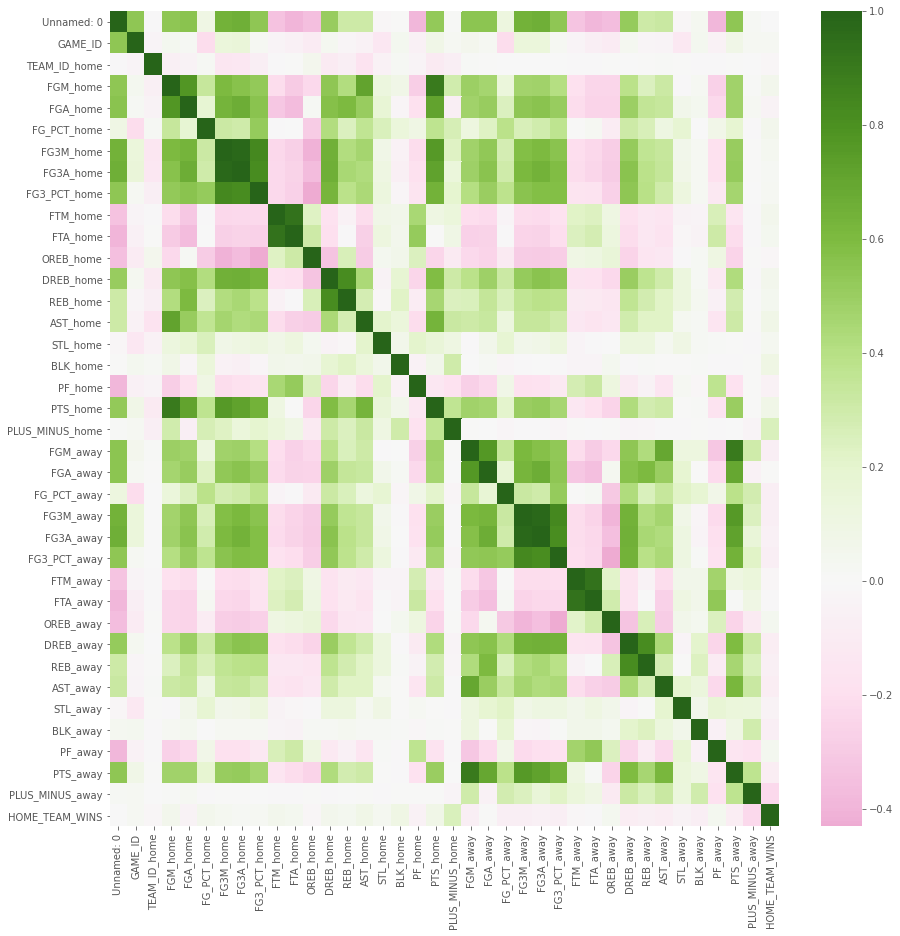

In [4]:
plt.figure(figsize=(15,15))
sns.heatmap(df_exp.corr(), center = 0, cmap = 'PiYG')

In [5]:
df_exp.dropna(inplace=True)

In [6]:
df_exp.head()

,Unnamed: 0,GAME_ID,TEAM_ID_home,TEAM_ABBREVIATION_home,ABV_HOME_home,FGM_home,FGA_home,FG_PCT_home,FG3M_home,FG3A_home,FG3_PCT_home,FTM_home,FTA_home,OREB_home,DREB_home,REB_home,AST_home,STL_home,BLK_home,PF_home,PTS_home,PLUS_MINUS_home,FGM_away,FGA_away,FG_PCT_away,FG3M_away,FG3A_away,FG3_PCT_away,FTM_away,FTA_away,OREB_away,DREB_away,REB_away,AST_away,STL_away,BLK_away,PF_away,PTS_away,PLUS_MINUS_away,HOME_TEAM_WINS
0,8,11400010,1610612758,SAC,SAC,30.000000,64.000000,5.414000,5.000000,13.000000,1.900000,29.000000,40.000000,13.000000,32.000000,45.000000,18.000000,6.000000,4.000000,27.000000,94.000000,-25.000000,33.0,75.0,6.169,6.0,18.0,3.916,27.0,35.0,7.0,23.0,30.0,21.0,10.0,3.0,31.0,99.0,25.0,1
1,15,11400018,1610612740,NOP,NOP,35.764706,78.156863,6.869255,13.803922,31.686275,4.161765,12.235294,17.431373,10.078431,31.960784,42.039216,18.921569,6.313725,5.882353,25.078431,97.568627,56.470588,30.0,73.0,4.649,4.0,15.0,1.083,21.0,33.0,8.0,39.0,47.0,17.0,8.0,3.0,33.0,85.0,20.0,0
2,18,11400023,1610612745,HOU,HOU,36.000000,78.000000,6.025000,10.000000,26.000000,2.636000,29.000000,45.000000,14.000000,26.000000,40.000000,19.000000,14.000000,1.000000,45.000000,111.000000,15.000000,32.0,78.0,8.182,3.0,12.0,1.000,16.0,25.0,10.0,32.0,42.0,22.0,12.0,6.0,22.0,83.0,-15.0,1
3,19,11400024,1610612757,POR,POR,28.000000,81.000000,4.759000,3.000000,19.000000,0.900000,14.000000,20.000000,11.000000,34.000000,45.000000,13.000000,11.000000,3.000000,27.000000,73.000000,-95.000000,34.0,77.0,6.042,7.0,14.0,2.667,17.0,30.0,12.0,40.0,52.0,15.0,9.0,6.0,25.0,92.0,95.0,0
4,20,11400025,1610612765,DET,DET,39.000000,94.000000,3.786000,11.000000,32.000000,2.625000,22.000000,31.000000,11.000000,29.000000,40.000000,28.000000,6.000000,3.000000,31.000000,111.000000,10.000000,33.0,80.0,4.521,6.0,12.0,3.000,14.0,22.0,13.0,36.0,49.0,23.0,9.0,5.0,26.0,86.0,15.0,1


In [7]:
#Define Data
#Need to do train_test_split and test the model 

x = df_exp.loc[:,'FGM_home':'PLUS_MINUS_away'].values
y = df_exp['HOME_TEAM_WINS'].values

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1)

In [9]:
model = keras.Sequential(
    [
        layers.Dense(12, input_dim=  x.shape[1] , activation="relu"),
        layers.Dense(12, activation="relu"),
        layers.Dense(8, activation="relu"),
        layers.Dense(8, activation = "relu"),
        layers.Dense(6, activation="relu"),
        layers.Dense(8, activation="relu"),
        layers.Dense(8, activation="relu"),
        layers.Dense(6, activation="relu"),
        layers.Dense(1, activation ="sigmoid"),
    ]
)

In [10]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
# fit the keras model on the dataset
model.fit(x_train, y_train, epochs = 500, batch_size = 512, verbose = 0)

Text(0.5, 1.0, 'Accuracy per Epoch')

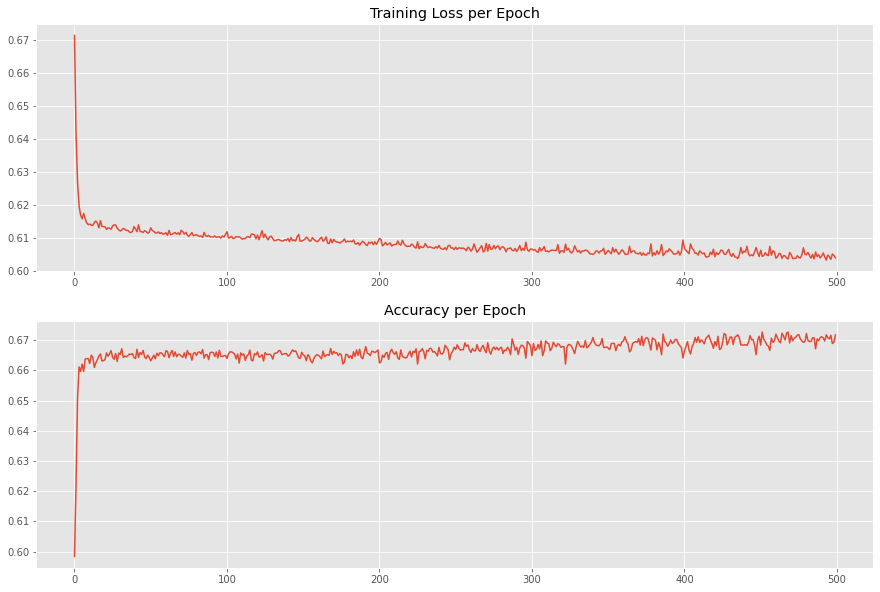

In [12]:
loss_history = model.history.history['loss']
acc_history = model.history.history['accuracy']

fig, ax = plt.subplots(2,1,figsize = (15,10))

plt.subplot(2,1,1)
plt.plot(range(len(loss_history)),loss_history)
plt.title("Training Loss per Epoch")

plt.subplot(2,1,2)
plt.plot(range(len(acc_history)),acc_history)
plt.title("Accuracy per Epoch")

In [13]:
y_hat = model.predict(x_test)

In [14]:
y_hat_bin = np.where(y_hat>=0.5,1,0)

In [15]:
from sklearn.metrics import accuracy_score

print('Our Accuracy Score is: ',accuracy_score(y_test, y_hat_bin))

Our Accuracy Score is:  0.6712458550450023


              precision    recall  f1-score   support

           0       0.63      0.40      0.49       830
           1       0.69      0.85      0.76      1281

    accuracy                           0.67      2111
   macro avg       0.66      0.62      0.62      2111
weighted avg       0.66      0.67      0.65      2111



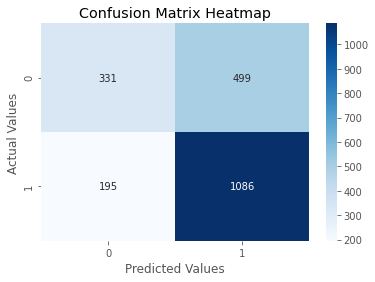

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

cfn_matrix1 = confusion_matrix(y_test, y_hat_bin, labels = [0,1])
cfn_report1 = classification_report(y_test, y_hat_bin)

sns.heatmap(cfn_matrix1, annot=True, fmt = 'd', cmap="Blues").set_title('Confusion Matrix Heatmap')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

print(cfn_report1)

In [17]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_hat, pos_label=1) 
AUC = auc(fpr, tpr)

print('Our AUC is: ',AUC)

Our AUC is:  0.7055585339014135


### Results:
- Our model has improved across accuracy, AUC, and precision and recall from our log reg classifier

In [18]:
model.save("my_model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: my_model\assets
